# GG4257 - Urban Analytics: A Toolkit for Sustainable Urban Development
## Lab Workbook No 5: Intro to Networks
---
Dr Fernando Benitez -  University of St Andrews - School of Geography and Sustainable Development - Iteration 2024

> **GOOD ACADEMIC PRACTICE**: As always, The University policy on Good Academic Practice applies. There are probably many ways to address the challenges in here or part of them. You are free to do research and find relevant resources, like the documentation website, if you cited them correctly. But I strongly advise not to use AI tools, most importantly because you won't learn/practice as you are supposed to.
>
>  If you are not aware of **our academic misconduct policy**, kindly take a quick look (Pag 8. https://www.st-ndrews.ac.uk/policy/academic-policies-assessment-examination-and-award-good-academic-practice/good-academic-practice-guidance-for-students-frequently-asked-questions.pdf)


# Notes from Lecture
Geodemographics: long history of use within cities. 
Variables and contexts: contests are the social, environmental, and economic settings within whih we live our lives. 
* places shape access to opportunity (neighborhood effects)
* related to geography, sociology, etc - see the population space and place journal

Varibales mode of inquiry: assessomg o,pact of abstract concepts on outcomes 
Contexutual analysiss: interconnected relationships

Geodemographics: summarise multiple characteristics of a set of small geographic areas (a cartography and a science), requires a degree of subjectivity 

Tapestry segementation by esri - US 

CDRC in the UK, or Esri demograohics regional data for UK 
* see arcgis online

Networkjs: not methods, mostly a ,mix of spatial joins and estimates 
Commonalities in decisions: 
* gathering a series of variables that are important to the differentiations of areas
* areas similarity is assessed through a clustering processes
* clusters are then examined by appending the input and exploring which attributes are over or under represented, relative to a bse such as the national average

See urban grammar - satellite imagry to classify land (first remote sensing, then clustered) 
* However, need to justify the inputs when creating the indicies
* for the index of mulitple deprivation, methods ibnclude shrinkage tehcnique 

Building an index: z-score is a standardisation technique (how many standard deviations a value is away from a mean distribution) 

Spatiali microsimulation is: 
Static spoatial microsimulation - snapshot - synthesises individual level populations from aggregate info - see tomintz and clarke 2008 - matches at the aggregate level but not necessarily at the individual level 
* deterministic reweighting through IPF (large iterativ e proportional fitting
* conditional probabilities
* simulated annealing
Trying to turn a selection of aggregate constaint tables into an individual level pop allocated
fit statistic used is normally total absolute error 
Dynamic spatial microsimulation - over space and time 

# Introduction to Networks

In this lab, you'll be introduced to fundamental concepts in network analytics while exploring a real-world network dataset. You'll also learn about [NetworkX][1], a library that allows you to manipulate, analyze, and model graph data ( the mathematical form of a network). You'll learn about the different types of graphs and how to visualize them rationally.


- Networks are a useful tool for modelling relationships between entities. Check the slides from Lecture 5 to see the main difference.
- By modelling the data as a network, you can gain insight into what entities (or nodes) are important.
- You can start to think about optimizing transportation between cities.
- Leverage the network structure to find communities in the network.

  [1]: https://networkx.github.io/documentation/stable/index.html

## Examples of Networks
1. Social:In a social network, we're modelling the relationship between people.

2. Mobility: In a transportation network, we're modelling the connectivity between locations as determined by the roads or flight paths connecting them.


## Network Structure

![image.png](https://github.com/trenton3983/DataCamp/blob/master/Images/2020-05-21_intro_to_network_analysis_in_python/network_structure_1.JPG?raw=true)

* Networks are described by two items, which form a "network":
 - Nodes
 - Edges
   
* In mathematical terms, this is a graph.
* Nodes and edges can have metadata associated with them.
 - Let's say two friends, Hugo and myself, met on May 21, 2016. The nodes may be "Hugo" and myself, with metadata stored in a `key-value` pair as `id` and `age`. The friendship is represented as a line between two nodes and may have metadata such as `date`, which represents the date we first met.
 
![social graph](https://github.com/trenton3983/DataCamp/blob/master/Images/2020-05-21_intro_to_network_analysis_in_python/network_structure_2.JPG?raw=true)


# NetworkX

>It is important you see how the data is being manipulated and you understand how the main methods in the library works, do not be afraid to change the code I provide in order to see what else you can or cant do. Make a copy of the original cell, then experiment.

This Python library is used to manipulate, analyze, and model graph data. Using `nx.Graph()`, we initialize an empty graph to which we can add nodes and edges.

Let's try adding nodes and edges, creating a graph from scratch:

- The integers 1, 2, and 3 can be entered as nodes using the `add_nodes_from` method, passing in the list `[1, 2, 3]` as an argument.
- Use the `.nodes` method to see the nodes present in the graph.
- Likewise, we can use `.add_edges` and `.edges` to add and see the edges present in the graph.
- Edges between nodes are represented as a **tuple**, in which each tuple shows the nodes that are present on that edge.

In [1]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.filterwarnings('ignore')

In [2]:
#Uncomment the following line to install Networkx, in case you don't have it.
#pip install networkx

SyntaxError: invalid syntax (3086329165.py, line 2)

In [11]:
import networkx as nx

G = nx.Graph() #There are many other types of graphs; see Lecture 5 for more details.
G.add_nodes_from([1, 2, 3])
G.nodes()

NodeView((1, 2, 3))

In [19]:
G.add_edge(1, 2)
G.add_edge(2, 3)
G.edges()

EdgeView([(1, 2), (2, 3)])

- Metadata (Information related to the network) can be stored on the graph as well.
- For example, I can add to the node `1`, a `label` key with the value `blue`, just as I would assign a value to the key of a python dictionary.
- The node list can be retrieved with `G.nodes()` and passing the `data=True` parameter.
- This returns a list of tuples (pairs), in which the first element of each tuple is the node, and the second element is a dictionary, in which the `key-value` pairs correspond to the metadata.

In [20]:
G.nodes[1]['label'] = 'blue'
G.nodes[1]['happy'] = 'yes'
G.nodes[2]['label'] = 'red'
G.nodes[2]['happy'] = 'no'
G.nodes[3]['label'] = 'red'
G.nodes[3]['happy'] = 'no'

G.nodes(data=True) #Try to add more metadata to the other nodes...

NodeDataView({1: {'label': 'blue', 'happy': 'yes'}, 2: {'label': 'red', 'happy': 'no'}, 3: {'label': 'red', 'happy': 'no'}})

We are used to seeing a Network by its common representation of nodes and edges, but by creating a graph from scratch, it is complicated to see how the network is and what they are connecting. Therefore, methods to draw graphs are always welcome. This can be very simple or very structured, depending on the type of draw we need, but we can start with the following:

- `networkx` provides basic drawing functionality, using the `nx.draw()` function, which uses a graph `G` as an argument.

- You'll also have to call `plt.show()` function to display the graph.

- With this graph, the `nx.draw()` function will draw to screen what we call a **node-link diagram** rendering of the graph.

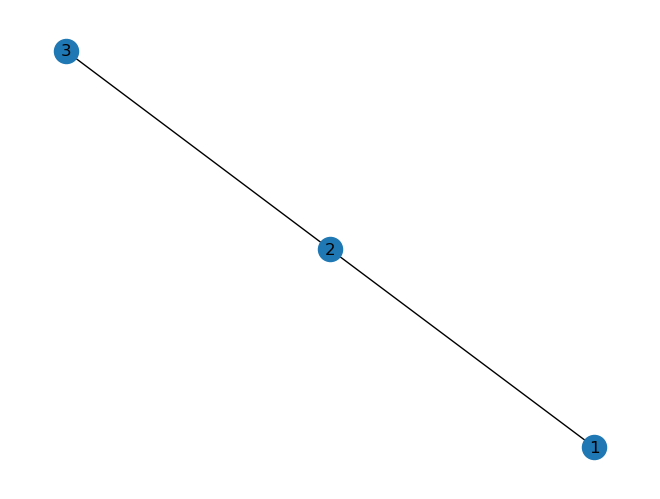

In [21]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True )
plt.show()

## Use case: Twitter network

We will review some basic functions that let you query a Twitter network `T`. The Twitter data shows a snapshot of a subset of Twitter users. The network dataset is anonymized but includes some metadata.

The data was extracted from:

* twitter = https://assets.datacamp.com/production/repositories/580/datasets/64cf6963a7e8005e3771ef3b256812a5797320f0/ego-twitter.p

The data format used to store a network in Python is a binary file called a pickle file. This file stores a Python object. More info at https://docs.python.org/3/library/pickle.html

In [23]:
import pickle

with open('data/ego-twitter.p', 'rb') as f:
    T = pickle.load(f)
T

Now, let's learn some very basic functions to explore the graph. 

In [24]:
print(len(T))# Tells you the size of the graph `T`, 
print(type(T.nodes())) # Tells you the type of `T.nodes()`
print(list(T.edges(data=True))[-1]) # Read the attributes associated with the last element of the edges list. 
print(list(T.nodes(data=True))[0]) # Read the attributes associated with the firts element of the node list.
print(type(list(T.edges(data=True))[-1][2])) # Wich type; therefore, you can see what you are reading.

23369
<class 'networkx.classes.reportviews.NodeView'>
(23324, 23336, {'date': datetime.date(2010, 9, 20)})
(1, {'category': 'I', 'occupation': 'politician'})
<class 'dict'>


The attributes associated with the `nodes` and the `edges` are `**category**`, `**ocupation**` for `nodes` and `**date**` for `edges`

## Queries on a network

After learning about some fundamental properties of the graph and practising its visualization using NetworkX's drawing tools, it's time to learn how to query nodes and edges. This involves searching for "nodes of interest" and "edges of interest".

You'll use the `.nodes()` and `.edges()` methods. The `.nodes()` method returns a list of nodes, while the `.edges()` method returns a list of tuples, in which each tuple shows the nodes that are present on that edge. 

There is a keyword argument `data=True` in these methods that also retrieves the corresponding metadata associated with the nodes and edges. 

You can examine other graph's properties like `T.adj` and `T.degree`. These are set-like views of the neighbours (adjacencies), and degrees of nodes in a graph.[1]

[1]: https://networkx.org/documentation/stable/tutorial.html#examining-elements-of-a-graph

In [25]:
#list(T.degree)
#list(T.adj)
list(T.edges)
#list(T.nodes) # Be aware you will get a massive list; recall the size of the network "23369"
# So we need a subset of that to make the exploration easier.

[(1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48),
 (1, 49),
 (16, 563),
 (16, 5384),
 (16, 5385),
 (16, 7881),
 (16, 573),
 (16, 7354),
 (16, 7355),
 (16, 7358),
 (16, 18),
 (16, 5586),
 (16, 580),
 (16, 35),
 (16, 10981),
 (16, 36),
 (16, 48),
 (16, 590),
 (16, 10982),
 (18, 6163),
 (18, 5578),
 (18, 16),
 (18, 7609),
 (18, 24),
 (18, 35),
 (18, 36),
 (18, 11609),
 (18, 11610),
 (18, 1326),
 (19, 5),
 (19, 8),
 (19, 12035),
 (19, 5399),
 (19, 11),
 (19, 5380),
 (19, 13),
 (19, 15),
 (19, 4390),
 (19, 17),
 (19, 5411),
 (19, 20),
 (19, 21),
 (19, 24),
 (19, 5426),
 (19, 12036),
 (19, 12037)

As the network is massive, we can make a subset by specifying only the node we want. This makes a use of something call `nbunch` to filter only nodes within the defined network

https://networkx.org/documentation/stable/reference/glossary.html#term-nbunch

In [26]:
edges_from_T=T.edges([36,1,75])
#edges_from_T=T.edges([36,1,75], data=True) #Give the edges where only 36, 1 and 75 are nodes.
edges_from_T

OutEdgeDataView([(36, 5), (36, 4390), (36, 18570), (36, 1307), (36, 18571), (36, 24), (36, 35), (36, 4452), (36, 12613), (36, 37), (36, 1325), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (75, 63), (75, 64), (75, 65), (75, 66), (75, 6627), (75, 2124), (75, 67), (75, 6629), (75, 6631), (75, 6632), (75, 879), (75, 6634), (75, 6624), (75, 69), (75, 6637), (75, 6638), (75, 6639), (75, 70), (75, 6641), (75, 6643), (75, 6644), (75, 71), (75, 6646), (75, 6648), (75, 72), (75, 73), (75, 6652), (75, 6655), (75, 82), (75, 74), (75, 10969), (75, 6656), (75, 6657), (75, 6658), (75, 76), (75, 83), (75, 6666), (75, 6677), (75, 78)])

We later create an empty graph.

In [27]:
T_sub = nx.DiGraph()
len(T_sub)

0

In [28]:
T_sub.add_edges_from(edges_from_T) #Adding the list from the subset of nodes.
len(T_sub)

95

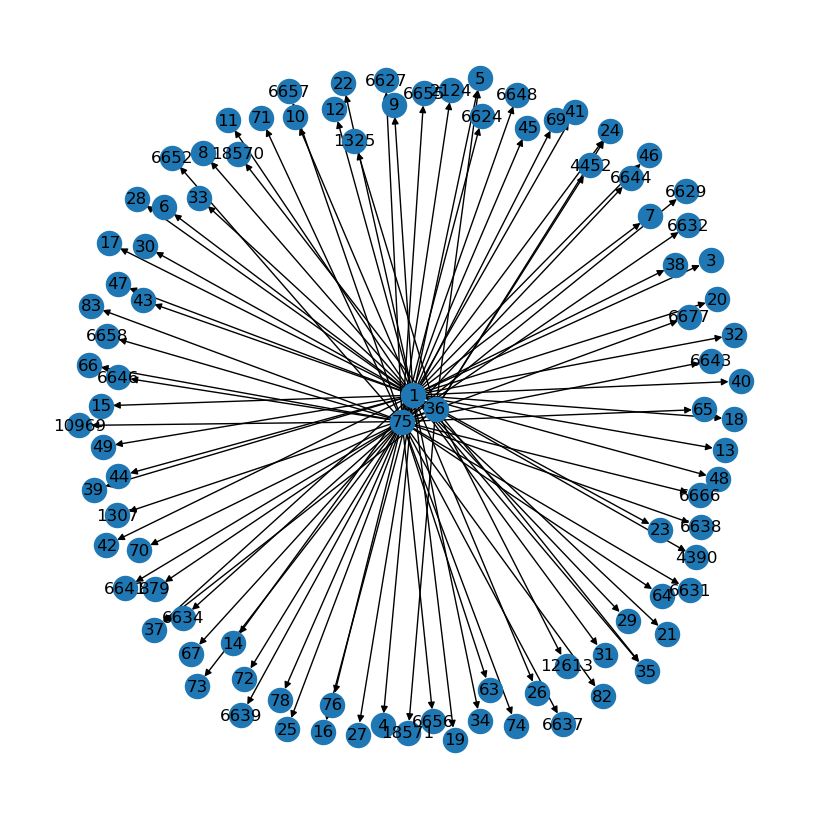

In [29]:
plt.figure(figsize=(8, 8))
nx.draw(T_sub, with_labels=True)
plt.show()

## List comprehensions

So far, you have been working using traditional loops that iterate over iterable objects like lists, arrays or data frames. However, that often isn't the most effective way to iterate over an object with multiple items. We can use `list comprehensions` to iterate over Python objects effectively and build queries in one line, rather than a loop that usually involves `.append` methods.  For a detailed  description of list comprehensions, refer to [2] of DataCamp's Python Data Science Toolbox course. 

If you want to create a list comprehension, here is a recipe for it:

> `[` *output expression* `for` *iterator variable* `in` *iterable* `if` *predicate expression* `]`.

For example, if your task is to get a **list of nodes** from the graph `T` with the `'occupation'` label of `'scientist'`. You need to loop over the list of nodes (`T.nodes(data=True)`, including the metadata), and then get each value in the list, but only under the conditions that the `occupation` attribute is equal to `scientist`

So traditionally, you will be asked to make an empty list, then a For loop, and then use the append to get all the values in the empty list appended.

```python
noi = []
for n, a in T.nodes(data=True): # where a is the attribute we need to filter, and n the nodes.
    if a['occupation'] == 'scientist':
        noi.append(n)
    
````
Instead of using four lines of code, we can use list comprehensions in the following way: 

```python
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, a in T.nodes(data=True) if a['occupation'] == 'scientist']
```
Now, it's the same process for the **edges of interest -eoi**; in this case, you are iterating over a tuple, so you need one extra argument. Traditionally, you will have to:

```python
eoi = []
for u, v, d in T.edges(data=True): #where u, v are the nodes conforming the edge. and d the attribute associated with date
    if d['date'].year < 2010:
        eoi.append((u, v))
````
But a more effective code would be:

```python
# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'].year < 2010]
```

[2]: https://www.datacamp.com/courses/python-data-science-toolbox-part-2


In [30]:
noi = [n for n, a in T.nodes(data=True) if a['occupation'] == 'scientist']
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'].year < 2010]

In [31]:
print(noi[:10])
print(eoi[:10])

[5, 9, 13, 15, 17, 19, 20, 22, 23, 27]
[(1, 5), (1, 9), (1, 13), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 24), (1, 27)]


# Types of Graphs/Networks

See the Lecture No 5 for more detailed information.

1. **Undirected graphs**
 - e.g. Facebook, when one user befriends another, the two are automatically connected with an edge.
 - They are comprised of edges that don't have any inherent directionality associated with them.
 - This is commonly drawn as a line with no arrows between two circles.
 - Undirected graphs have the type `Graph`
 
```python
import networkx as nx

G = nx.Graph()
type(G)
>>> networkx.classes.graph.Graph
``` 


2. **Directed graphs**
 - e.g. Twitter, one user may follow another, but that other user may not follow back.
 - This is because of the nature of how users interact with one another.
 - As such, there's an inherent directionality associated with the graph
 - Directed grasphs have the type `DiGraph`
 
```python
D = nx.DiGraph()
type(D)
>>> networkx.classes.digraph.DiGraph
```

3. **Muti-edge (Directed) graphs**
   
 - Graph in which there are multiple edges permitted between the nodes
 - For example, we may want to model trips between bike-sharing stations
 - Each trip may be one edge between the pair of stations
 - Sometimes, for practical reasons, it may be too memory-intensive to model multiple edges per pair of nodes. So, one may choose to collapse the edges into a single edge that contains a metadata summary of the original.
 - For example, we may want to collapse these three edges into a single one and give them a _weight_ metadata with the value _3_, indicating that it was originally three edges between the pair of nodes.

![multi-edge][1]

```python
M = nx.MultiGraph
type(M)
>>> networkx.classes.multigraph.MultiGraph

MD = nx.MultiDiGraph
type(MD)
>>> networkx.classes.multidigraph.MultiDiGraph
```

4. **Self-loops**: Self-loops can be used in certain scenarios, such as in bike sharing data, where a trip begins at a station and ends at the same station.


[1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/multi-edge.JPG

## Self-loops

NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, where individuals begin at one location and end in another.

It is useful to check for this before proceeding with further analyses, and NetworkX graphs provide a method for this purpose: `.number_of_selfloops()`

Here we use the `.number_of_selfloops()` method on `T` to get the number of edges that begin and end on the same node. 

In [32]:
nx.number_of_selfloops(T)

42

## Specifying a weight on edges

Weights can be added to edges in a graph, typically indicating the _strength_ of an edge. In NetworkX, the weight is indicated by the `'weight'` key in the metadata dictionary.

Refer to the following template to set an attribute of an edge: `network_name.edges[node1, node2]['attribute'] = value`. Here, the `'attribute'` is `'weight'`.

- If we want to set the `'weight'` attribute of the edge between node `1` and `10` of `T` to be equal to `2`.
  We could just `T.edges[1, 10]['weight'] = 2`
- If we want to set the weight of every edge involving node `293` to be equal to `1.1`.
  We can use a `for` loop and iterate over all the edges of `T`, including the `metadata`. If `293` is involved in the list of nodes `[u, v]`, we set the weight of the edge between `u` and `v` to be `1.1`.

In [33]:
T.edges[1, 10] #See that you only have one category.

{'date': datetime.date(2012, 9, 8)}

In [34]:
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2
T.edges[1, 10] # Now you have two categories

{'date': datetime.date(2012, 9, 8), 'weight': 2}

In [36]:
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        T.edges[u, v]['weight'] = 1.1

In [ ]:
#pip install nxviz
#Uncomment the previous line in case you don't have nxviz

## Plotting networks

1. **Matrix plots**: Nodes are the rows and columns of a matrix, and cells are filled in according to whether an edge exists between the pairs of nodes.

   ![image](https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/matrix_plots.JPG)

In an undirected graph, the matrix is symmetrical around the diagonal, which is highlighted in grey.
* Figure 3: edge (A, B) is equivalent to edge (B, A).  Highlighted in yellow.
* Figure 4: edge (A, C) is equivalent to edge (C, A), because there's no directionality associated with that edge.
  
- With directed graphs, the matrix representation is not necessarily going to be symmetrical.
  * Figure 5: there's a bidirectional edge between A and C, but only an edge from A to B and not B to A.
  * (A, B) will be filled in, but not (B, A)

- If the nodes are ordered along the rows and columns, such that neighbours are listed close to one another, then a matrix plot can be used to visualise clusters, or communities, of nodes.

2. **Arc plots**
 - ![arc_plots][2]
 -  Is it a transformation of the node-link diagram layout, in which nodes are ordered along one axis of the plot, and edges are drawn using circular arcs from one node to another
 - If the nodes are ordered according to some sortable rule, such as age in a social network of users, or otherwise grouped together by geographic location in a map for a transportation network, then it will be possible to visualise the relationship between connectivity and the sorted (or grouped) property.
  - Arc plots are a good starting point for visualizing a network, as they form the basis of the later plots that we'll take a look at.
   
3. **Circos plots**
 - ![circo_plot][3]
 - It is a transformation of the Arc Plot, such that two ends of the Arc Plot are joined together into a circle.
 - Were originally designed for use in genomics, and you can think of them as an aesthetic and compact alternative to Arc Plots.
- You will be using [nxviz][4] to plot the graphs.

  [2]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/arc_plots.JPG
  [3]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/circo_plots.JPG
  [4]: https://github.com/ericmjl/nxviz

Now lets see how we can plot these types of graphs using an additional library, `nxviz`, which is a package for visualizing graphs in a rational fashion; under the hood, the `MatrixPlo`t utilizes `nx.to_numpy_matrix(G)`, which returns the matrix form of the graph. 

See more in: https://nxviz.readthedocs.io/en/latest/usage.html

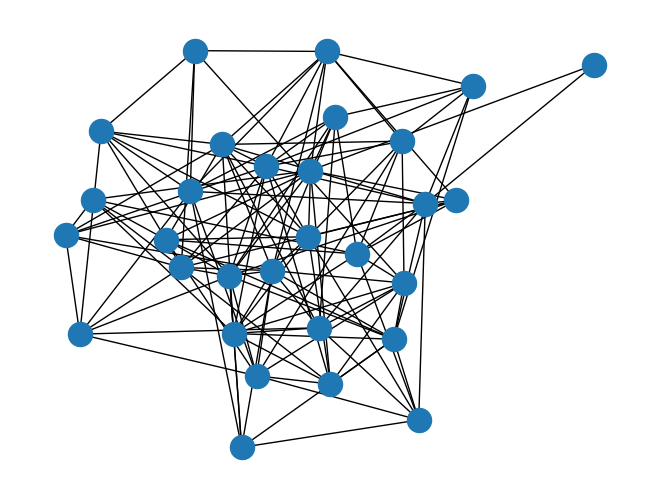

In [41]:
#Basic plot of a graph

import networkx as nx
import matplotlib.pyplot as plt

er = nx.erdos_renyi_graph(30, 0.3)
nx.draw(er)
plt.show()

In [42]:
# Now, let's create a synthetic network to make several plots.
import nxviz as nv
from datetime import datetime, date

data = [(13829, 1386, {'date': date(2012, 3, 13)}), (3086, 669, {'date': date(2009, 3, 1)}), (3086, 3100, {'date': date(2013, 8, 10)}), (3086, 3117, {'date': date(2007, 12, 20)}), (4111, 4133, {'date': date(2007, 10, 28)}), (4111, 12582, {'date': date(2013, 6, 1)}), (6163, 7331, {'date': date(2013, 2, 3)}), (6163, 7336, {'date': date(2007, 9, 12)}), (6163, 6168, {'date': date(2008, 4, 2)}), (6163, 1326, {'date': date(2009, 2, 16)}), (4636, 4666, {'date': date(2012, 3, 20)}), (543, 12123, {'date': date(2014, 8, 12)}), (36, 24, {'date': date(2009, 4, 23)}), (12836, 12856, {'date': date(2014, 2, 21)}), (10790, 10854, {'date': date(2009, 8, 11)}), (9262, 9338, {'date': date(2007, 11, 11)}), (4160, 4161, {'date': date(2012, 4, 14)}), (4160, 3681, {'date': date(2013, 8, 10)}), (7746, 3396, {'date': date(2007, 2, 23)}), (7746, 543, {'date': date(2011, 7, 14)}), (7746, 5073, {'date': date(2012, 2, 25)}), (7746, 1130, {'date': date(2013, 8, 4)}), (7746, 3265, {'date': date(2008, 11, 8)}), (19013, 21248, {'date': date(2009, 3, 21)}), (19013, 21253, {'date': date(2007, 8, 17)}), (14916, 14930, {'date': date(2012, 4, 10)}), (5717, 5752, {'date': date(2009, 2, 2)}), (3159, 3176, {'date': date(2011, 8, 15)}), (3159, 3177, {'date': date(2008, 2, 1)}), (3159, 3193, {'date': date(2014, 1, 2)}), (1627, 1648, {'date': date(2011, 11, 7)}), (19550, 19570, {'date': date(2009, 11, 13)}), (5215, 5217, {'date': date(2011, 1, 7)}), (4198, 16203, {'date': date(2014, 12, 1)}), (3177, 3159, {'date': date(2010, 6, 2)}), (3177, 3176, {'date': date(2014, 11, 10)}), (1134, 2406, {'date': date(2011, 7, 10)}), (1134, 543, {'date': date(2011, 10, 20)}), (4206, 21962, {'date': date(2014, 4, 17)}), (6770, 2671, {'date': date(2010, 5, 18)}), (11384, 4955, {'date': date(2007, 2, 12)}), (11384, 2406, {'date': date(2007, 10, 13)}), (11384, 11402, {'date': date(2009, 11, 27)}), (10877, 10917, {'date': date(2014, 7, 17)}), (10877, 7886, {'date': date(2009, 1, 4)}), (10877, 36, {'date': date(2008, 10, 25)}), (10877, 10936, {'date': date(2008, 12, 26)}), (10877, 1326, {'date': date(2012, 1, 19)}), (10373, 1386, {'date': date(2011, 4, 21)}), (10373, 2501, {'date': date(2012, 8, 13)}), (3213, 3214, {'date': date(2008, 4, 19)}), (3213, 3265, {'date': date(2007, 8, 8)}), (3213, 3266, {'date': date(2009, 1, 4)}), (5626, 16654, {'date': date(2011, 3, 5)}), (20122, 20177, {'date': date(2014, 12, 21)}), (667, 669, {'date': date(2014, 2, 3)}), (667, 747, {'date': date(2008, 2, 23)}), (161, 18159, {'date': date(2014, 9, 22)}), (7331, 6163, {'date': date(2012, 10, 15)}), (7331, 6168, {'date': date(2012, 3, 17)}), (7331, 7606, {'date': date(2008, 11, 7)}), (7331, 24, {'date': date(2009, 9, 21)}), (7331, 36, {'date': date(2010, 5, 26)}), (10917, 10877, {'date': date(2011, 9, 7)}), (10917, 24, {'date': date(2014, 10, 16)}), (10917, 7886, {'date': date(2011, 7, 13)}), (10917, 36, {'date': date(2013, 8, 8)}), (10917, 1326, {'date': date(2009, 5, 23)}), (22184, 22188, {'date': date(2012, 11, 3)}), (6318, 6301, {'date': date(2011, 4, 3)}), (8367, 8421, {'date': date(2012, 7, 10)}), (21167, 3931, {'date': date(2012, 7, 9)}), (3265, 4955, {'date': date(2012, 6, 6)}), (3265, 4811, {'date': date(2014, 9, 18)}), (3265, 3266, {'date': date(2008, 9, 24)}), (3266, 4811, {'date': date(2007, 2, 16)}), (3266, 1926, {'date': date(2008, 3, 16)}), (3266, 3265, {'date': date(2014, 5, 25)}), (4291, 4306, {'date': date(2014, 9, 9)}), (4291, 4310, {'date': date(2007, 9, 11)}), (4811, 4955, {'date': date(2007, 4, 19)}), (4811, 3265, {'date': date(2013, 8, 23)}), (4811, 3266, {'date': date(2008, 8, 25)}), (7886, 10877, {'date': date(2012, 9, 5)}), (7886, 10917, {'date': date(2008, 9, 19)}), (7886, 24, {'date': date(2014, 8, 17)}), (7886, 36, {'date': date(2012, 9, 21)}), (7886, 1326, {'date': date(2012, 3, 23)}), (6863, 14981, {'date': date(2012, 8, 7)}), (13012, 13017, {'date': date(2012, 3, 4)}), (16597, 24, {'date': date(2012, 5, 2)}), (16597, 36, {'date': date(2011, 4, 19)}), (16597, 16610, {'date': date(2011, 11, 11)}), (12507, 12523, {'date': date(2012, 3, 11)}), (16618, 16619, {'date': date(2013, 3, 3)}), (13036, 15161, {'date': date(2012, 4, 23)}), (3826, 669, {'date': date(2014, 11, 9)}), (3826, 3100, {'date': date(2009, 2, 24)}), (3826, 3860, {'date': date(2013, 7, 27)}), (3826, 3681, {'date': date(2013, 2, 14)}), (7410, 7437, {'date': date(2012, 5, 2)}), (15092, 2148, {'date': date(2014, 11, 11)}), (15092, 20816, {'date': date(2009, 4, 8)}), (2820, 2826, {'date': date(2011, 10, 1)}), (2820, 2871, {'date': date(2010, 3, 26)}), (2311, 2371, {'date': date(2008, 8, 26)}), (11020, 11042, {'date': date(2008, 5, 12)}), (13070, 13079, {'date': date(2009, 10, 15)}), (20755, 24, {'date': date(2010, 11, 26)}), (20755, 1326, {'date': date(2014, 5, 2)}), (20756, 669, {'date': date(2012, 9, 7)}), (20756, 3100, {'date': date(2013, 3, 17)}), (20756, 3681, {'date': date(2010, 12, 9)}), (14613, 14617, {'date': date(2009, 6, 2)}), (10004, 10030, {'date': date(2008, 3, 1)}), (10004, 10111, {'date': date(2011, 7, 15)}), (4892, 1130, {'date': date(2011, 12, 10)}), (4892, 4947, {'date': date(2012, 3, 6)}), (2871, 15372, {'date': date(2014, 4, 27)}), (6968, 669, {'date': date(2010, 2, 6)}), (6968, 1386, {'date': date(2012, 9, 20)}), (6968, 4133, {'date': date(2012, 9, 22)}), (3385, 3396, {'date': date(2008, 3, 4)}), (8001, 23190, {'date': date(2008, 6, 26)}), (19787, 13581, {'date': date(2012, 4, 3)}), (21325, 21371, {'date': date(2009, 8, 2)}), (16720, 16734, {'date': date(2007, 10, 26)}), (16720, 16739, {'date': date(2008, 10, 24)}), (12119, 24, {'date': date(2013, 6, 1)}), (12119, 36, {'date': date(2007, 5, 1)}), (22872, 22918, {'date': date(2014, 7, 15)}), (7519, 16041, {'date': date(2012, 7, 8)}), (12640, 18082, {'date': date(2007, 4, 20)}), (12640, 18086, {'date': date(2008, 7, 8)}), (5987, 4957, {'date': date(2010, 12, 4)}), (5987, 492, {'date': date(2009, 6, 25)}), (19316, 19344, {'date': date(2013, 3, 15)}), (19316, 2501, {'date': date(2011, 11, 15)}), (13690, 4955, {'date': date(2014, 4, 5)}), (12162, 15560, {'date': date(2011, 1, 4)}), (2443, 3564, {'date': date(2014, 1, 9)}), (401, 492, {'date': date(2010, 11, 25)}), (401, 502, {'date': date(2013, 6, 27)}), (9106, 9107, {'date': date(2012, 5, 4)}), (8598, 8616, {'date': date(2011, 2, 6)}), (21919, 4161, {'date': date(2007, 7, 18)}), (21919, 669, {'date': date(2011, 12, 12)}), (21919, 3100, {'date': date(2012, 10, 15)}), (21919, 3681, {'date': date(2011, 1, 14)}), (10143, 4306, {'date': date(2009, 5, 26)}), (4517, 6414, {'date': date(2008, 7, 15)}), (20906, 2406, {'date': date(2012, 9, 5)}), (20906, 492, {'date': date(2013, 8, 12)}), (6059, 20368, {'date': date(2008, 11, 20)}), (2501, 1386, {'date': date(2009, 5, 1)}), (2501, 10373, {'date': date(2012, 7, 15)}), (13257, 13286, {'date': date(2008, 11, 4)}), (1484, 1492, {'date': date(2008, 6, 5)}), (1484, 1499, {'date': date(2013, 8, 9)}), (1996, 6038, {'date': date(2012, 7, 28)}), (20947, 669, {'date': date(2011, 7, 19)}), (20947, 3100, {'date': date(2010, 11, 23)}), (20947, 3681, {'date': date(2008, 6, 20)}), (5590, 5601, {'date': date(2012, 8, 17)}), (5590, 5626, {'date': date(2013, 8, 18)}), (18917, 19012, {'date': date(2013, 12, 15)}), (18917, 19013, {'date': date(2014, 1, 17)}), (10730, 24, {'date': date(2010, 1, 21)}), (10730, 36, {'date': date(2014, 1, 11)}), (10730, 1326, {'date': date(2008, 11, 4)}), (23024, 669, {'date': date(2010, 6, 15)}), (23024, 3100, {'date': date(2012, 6, 1)}), (23024, 23091, {'date': date(2011, 5, 20)}), (5109, 5112, {'date': date(2007, 5, 10)}), (13306, 13334, {'date': date(2014, 5, 18)})]
attr = {13829: {'category': 'D', 'occupation': 'celebrity'}, 15372: {'category': 'D', 'occupation': 'celebrity'}, 3086: {'category': 'P', 'occupation': 'scientist'}, 4111: {'category': 'D', 'occupation': 'scientist'}, 6163: {'category': 'P', 'occupation': 'scientist'}, 13334: {'category': 'P', 'occupation': 'scientist'}, 6168: {'category': 'P', 'occupation': 'celebrity'}, 24: {'category': 'P', 'occupation': 'politician'}, 3100: {'category': 'D', 'occupation': 'scientist'}, 4636: {'category': 'D', 'occupation': 'celebrity'}, 543: {'category': 'D', 'occupation': 'politician'}, 36: {'category': 'D', 'occupation': 'scientist'}, 12836: {'category': 'I', 'occupation': 'celebrity'}, 4133: {'category': 'D', 'occupation': 'scientist'}, 10790: {'category': 'D', 'occupation': 'scientist'}, 3117: {'category': 'P', 'occupation': 'politician'}, 9262: {'category': 'I', 'occupation': 'scientist'}, 23091: {'category': 'P', 'occupation': 'celebrity'}, 12856: {'category': 'D', 'occupation': 'politician'}, 4666: {'category': 'P', 'occupation': 'politician'}, 4160: {'category': 'P', 'occupation': 'politician'}, 4161: {'category': 'I', 'occupation': 'politician'}, 7746: {'category': 'P', 'occupation': 'scientist'}, 19012: {'category': 'D', 'occupation': 'politician'}, 19013: {'category': 'I', 'occupation': 'politician'}, 14916: {'category': 'I', 'occupation': 'politician'}, 14930: {'category': 'P', 'occupation': 'celebrity'}, 5717: {'category': 'P', 'occupation': 'politician'}, 3159: {'category': 'I', 'occupation': 'scientist'}, 1627: {'category': 'I', 'occupation': 'scientist'}, 19550: {'category': 'D', 'occupation': 'politician'}, 5215: {'category': 'P', 'occupation': 'politician'}, 5217: {'category': 'D', 'occupation': 'scientist'}, 3681: {'category': 'I', 'occupation': 'politician'}, 2148: {'category': 'D', 'occupation': 'politician'}, 4198: {'category': 'D', 'occupation': 'celebrity'}, 10854: {'category': 'D', 'occupation': 'politician'}, 3176: {'category': 'D', 'occupation': 'scientist'}, 3177: {'category': 'I', 'occupation': 'scientist'}, 1130: {'category': 'I', 'occupation': 'celebrity'}, 1134: {'category': 'P', 'occupation': 'scientist'}, 4206: {'category': 'I', 'occupation': 'scientist'}, 2671: {'category': 'P', 'occupation': 'scientist'}, 1648: {'category': 'P', 'occupation': 'politician'}, 19570: {'category': 'P', 'occupation': 'scientist'}, 6770: {'category': 'D', 'occupation': 'celebrity'}, 5752: {'category': 'D', 'occupation': 'scientist'}, 11384: {'category': 'D', 'occupation': 'politician'}, 3193: {'category': 'P', 'occupation': 'politician'}, 9338: {'category': 'I', 'occupation': 'politician'}, 10877: {'category': 'P', 'occupation': 'celebrity'}, 10373: {'category': 'I', 'occupation': 'politician'}, 14981: {'category': 'P', 'occupation': 'celebrity'}, 11402: {'category': 'I', 'occupation': 'politician'}, 3213: {'category': 'D', 'occupation': 'politician'}, 3214: {'category': 'P', 'occupation': 'celebrity'}, 5626: {'category': 'P', 'occupation': 'politician'}, 23190: {'category': 'P', 'occupation': 'celebrity'}, 20122: {'category': 'D', 'occupation': 'politician'}, 667: {'category': 'P', 'occupation': 'politician'}, 6301: {'category': 'I', 'occupation': 'scientist'}, 669: {'category': 'I', 'occupation': 'celebrity'}, 161: {'category': 'D', 'occupation': 'politician'}, 18082: {'category': 'I', 'occupation': 'celebrity'}, 7331: {'category': 'I', 'occupation': 'celebrity'}, 10917: {'category': 'P', 'occupation': 'scientist'}, 18086: {'category': 'D', 'occupation': 'scientist'}, 22184: {'category': 'P', 'occupation': 'scientist'}, 7336: {'category': 'D', 'occupation': 'scientist'}, 16041: {'category': 'P', 'occupation': 'scientist'}, 22188: {'category': 'I', 'occupation': 'scientist'}, 6318: {'category': 'P', 'occupation': 'politician'}, 8367: {'category': 'I', 'occupation': 'politician'}, 21167: {'category': 'D', 'occupation': 'celebrity'}, 10936: {'category': 'P', 'occupation': 'scientist'}, 3265: {'category': 'I', 'occupation': 'celebrity'}, 3266: {'category': 'P', 'occupation': 'politician'}, 4291: {'category': 'P', 'occupation': 'politician'}, 15560: {'category': 'P', 'occupation': 'celebrity'}, 4811: {'category': 'P', 'occupation': 'politician'}, 7886: {'category': 'P', 'occupation': 'politician'}, 6863: {'category': 'I', 'occupation': 'scientist'}, 20177: {'category': 'P', 'occupation': 'scientist'}, 4306: {'category': 'P', 'occupation': 'scientist'}, 13012: {'category': 'D', 'occupation': 'celebrity'}, 16597: {'category': 'P', 'occupation': 'celebrity'}, 4310: {'category': 'D', 'occupation': 'scientist'}, 13017: {'category': 'I', 'occupation': 'politician'}, 12507: {'category': 'I', 'occupation': 'politician'}, 16610: {'category': 'I', 'occupation': 'celebrity'}, 8421: {'category': 'I', 'occupation': 'politician'}, 16618: {'category': 'D', 'occupation': 'politician'}, 16619: {'category': 'I', 'occupation': 'celebrity'}, 13036: {'category': 'D', 'occupation': 'politician'}, 12523: {'category': 'P', 'occupation': 'politician'}, 747: {'category': 'D', 'occupation': 'politician'}, 18159: {'category': 'P', 'occupation': 'celebrity'}, 3826: {'category': 'P', 'occupation': 'politician'}, 7410: {'category': 'D', 'occupation': 'scientist'}, 15092: {'category': 'I', 'occupation': 'scientist'}, 21248: {'category': 'I', 'occupation': 'politician'}, 2820: {'category': 'I', 'occupation': 'celebrity'}, 21253: {'category': 'P', 'occupation': 'celebrity'}, 2311: {'category': 'I', 'occupation': 'politician'}, 2826: {'category': 'D', 'occupation': 'celebrity'}, 11020: {'category': 'D', 'occupation': 'politician'}, 7437: {'category': 'P', 'occupation': 'celebrity'}, 16654: {'category': 'I', 'occupation': 'scientist'}, 6414: {'category': 'D', 'occupation': 'scientist'}, 13070: {'category': 'I', 'occupation': 'politician'}, 13581: {'category': 'D', 'occupation': 'politician'}, 20755: {'category': 'D', 'occupation': 'celebrity'}, 20756: {'category': 'I', 'occupation': 'scientist'}, 14613: {'category': 'I', 'occupation': 'celebrity'}, 10004: {'category': 'I', 'occupation': 'politician'}, 3860: {'category': 'D', 'occupation': 'celebrity'}, 13079: {'category': 'D', 'occupation': 'celebrity'}, 14617: {'category': 'P', 'occupation': 'celebrity'}, 4892: {'category': 'P', 'occupation': 'celebrity'}, 11042: {'category': 'I', 'occupation': 'celebrity'}, 12582: {'category': 'P', 'occupation': 'politician'}, 1326: {'category': 'D', 'occupation': 'scientist'}, 10030: {'category': 'I', 'occupation': 'celebrity'}, 2871: {'category': 'P', 'occupation': 'scientist'}, 6968: {'category': 'P', 'occupation': 'celebrity'}, 3385: {'category': 'D', 'occupation': 'scientist'}, 15161: {'category': 'D', 'occupation': 'scientist'}, 8001: {'category': 'P', 'occupation': 'celebrity'}, 2371: {'category': 'D', 'occupation': 'scientist'}, 3396: {'category': 'P', 'occupation': 'scientist'}, 16203: {'category': 'D', 'occupation': 'politician'}, 19787: {'category': 'D', 'occupation': 'politician'}, 21325: {'category': 'P', 'occupation': 'scientist'}, 20816: {'category': 'I', 'occupation': 'scientist'}, 16720: {'category': 'I', 'occupation': 'scientist'}, 4947: {'category': 'I', 'occupation': 'celebrity'}, 12119: {'category': 'D', 'occupation': 'politician'}, 22872: {'category': 'I', 'occupation': 'politician'}, 12123: {'category': 'D', 'occupation': 'celebrity'}, 4955: {'category': 'P', 'occupation': 'celebrity'}, 4957: {'category': 'D', 'occupation': 'celebrity'}, 16734: {'category': 'D', 'occupation': 'politician'}, 7519: {'category': 'I', 'occupation': 'politician'}, 12640: {'category': 'P', 'occupation': 'celebrity'}, 3931: {'category': 'I', 'occupation': 'celebrity'}, 5987: {'category': 'D', 'occupation': 'scientist'}, 16739: {'category': 'I', 'occupation': 'celebrity'}, 2406: {'category': 'I', 'occupation': 'scientist'}, 1386: {'category': 'I', 'occupation': 'politician'}, 19316: {'category': 'I', 'occupation': 'politician'}, 13690: {'category': 'I', 'occupation': 'celebrity'}, 21371: {'category': 'P', 'occupation': 'scientist'}, 10111: {'category': 'I', 'occupation': 'celebrity'}, 12162: {'category': 'I', 'occupation': 'celebrity'}, 22918: {'category': 'I', 'occupation': 'celebrity'}, 1926: {'category': 'D', 'occupation': 'celebrity'}, 2443: {'category': 'I', 'occupation': 'scientist'}, 20368: {'category': 'I', 'occupation': 'politician'}, 19344: {'category': 'D', 'occupation': 'politician'}, 401: {'category': 'P', 'occupation': 'celebrity'}, 9106: {'category': 'P', 'occupation': 'scientist'}, 9107: {'category': 'D', 'occupation': 'celebrity'}, 6038: {'category': 'I', 'occupation': 'celebrity'}, 8598: {'category': 'P', 'occupation': 'politician'}, 21919: {'category': 'I', 'occupation': 'celebrity'}, 10143: {'category': 'P', 'occupation': 'celebrity'}, 4517: {'category': 'D', 'occupation': 'celebrity'}, 8616: {'category': 'D', 'occupation': 'celebrity'}, 20906: {'category': 'D', 'occupation': 'celebrity'}, 6059: {'category': 'D', 'occupation': 'scientist'}, 7606: {'category': 'P', 'occupation': 'scientist'}, 2501: {'category': 'P', 'occupation': 'scientist'}, 13257: {'category': 'D', 'occupation': 'celebrity'}, 21962: {'category': 'D', 'occupation': 'politician'}, 1484: {'category': 'I', 'occupation': 'politician'}, 1996: {'category': 'D', 'occupation': 'celebrity'}, 5073: {'category': 'P', 'occupation': 'celebrity'}, 20947: {'category': 'I', 'occupation': 'celebrity'}, 1492: {'category': 'D', 'occupation': 'celebrity'}, 5590: {'category': 'I', 'occupation': 'politician'}, 1499: {'category': 'P', 'occupation': 'celebrity'}, 5601: {'category': 'P', 'occupation': 'scientist'}, 18917: {'category': 'D', 'occupation': 'celebrity'}, 13286: {'category': 'I', 'occupation': 'scientist'}, 10730: {'category': 'D', 'occupation': 'celebrity'}, 492: {'category': 'I', 'occupation': 'politician'}, 3564: {'category': 'P', 'occupation': 'scientist'}, 23024: {'category': 'P', 'occupation': 'politician'}, 5109: {'category': 'I', 'occupation': 'politician'}, 502: {'category': 'P', 'occupation': 'scientist'}, 5112: {'category': 'I', 'occupation': 'celebrity'}, 13306: {'category': 'D', 'occupation': 'scientist'}}
t_131 = nx.Graph()
t_131.add_nodes_from(attr)
t_131.add_edges_from(data)
nx.set_node_attributes(t_131, attr)

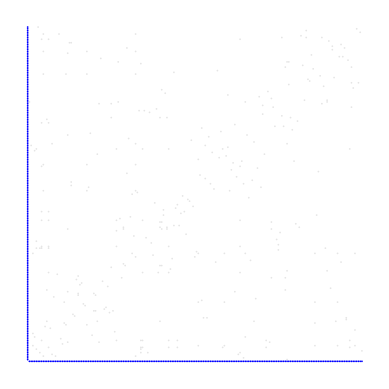

In [44]:
nv.MatrixPlot(t_131)
plt.show()

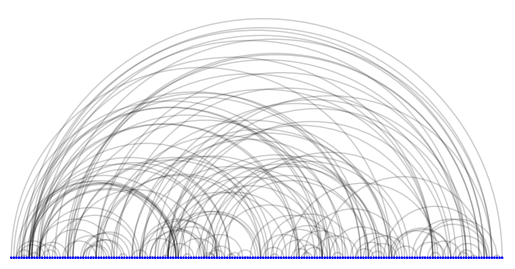

In [45]:
nv.ArcPlot(t_131)
plt.show()

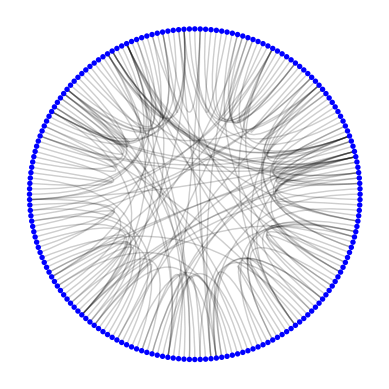

In [46]:
nv.CircosPlot(t_131)
plt.show()

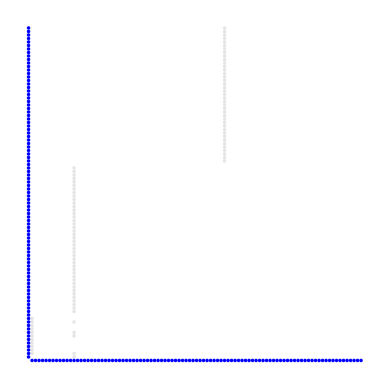

In [47]:
#Now the same but with the subset from twitter data.
nv.MatrixPlot(T_sub)
plt.show()

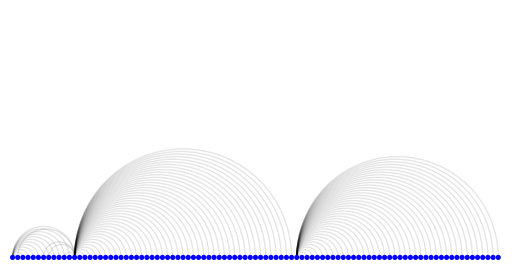

In [48]:
nv.ArcPlot(T_sub)
plt.show()

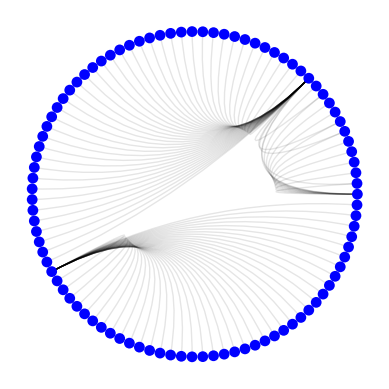

In [49]:
nv.CircosPlot(T_sub)
plt.show()

## Degree Centrality

How to determine which nodes are important 

- Which centre node might be more important?
  ![star_graph][1]

The centre node of the left graph is more important because it is connected to more nodes. Being connected to other nodes means other nodes are considered neighbours of that node. From the concept of neighbours, we can now introduce the concept of _degree centrality_

This is one of many metrics we can use to evaluate the importance of a node and is simply defined as the number of neighbours that a node has divided by the total number of neighbours that the node could possibly have:

> $\frac{\text{Number of Neighbors I Have}}{\text{Number of Neighbors I could Possibly Have}}$

Mathematically, the degree centrality $C_D(i)$of a node $i$ in an undirected graph is calculated as the ratio of the number of edges connected to node $i$ to the total number of nodes in the graph minus one: 

> $C_D(i) = \frac{\text{degree of node } i}{\text{total number of nodes} - 1}$

In a directed graph, there are two variants of degree centrality: in-degree centrality (counting incoming edges) and out-degree centrality (counting outgoing edges).

- There are two scenarios possible here:
  * if **self-loops are allowed**, such as in a network mapping of all bike trips in a bike-sharing system, then the number of neighbours that you could possibly have is every single node in the graph, including myself.
    
  * if **self-loops are not allowed**, such as in Twitter, where, by definition, your account cannot follow itself, then the number of neighbours you could possibly have is every other node in the graph, excluding myself.

- In the real world, the example of nodes in a graph that has a high degree of centrality might be:
  * Twitter broadcasters, that is, users that are followed by many other users
  * Airport transportation hubs, such as New York, London or Tokyo
  * Disease super-spreaders, who are the individuals that epidemiologists would want to track down to help stop the spread of a disease
   
  [1]: https://raw.githubusercontent.com/trenton3983/DataCamp/master/Images/2020-05-21_intro_to_network_analysis_in_python/star_graphs.JPG

Node 1: Degree Centrality = 0.750
Node 2: Degree Centrality = 0.500
Node 3: Degree Centrality = 0.750
Node 4: Degree Centrality = 0.500
Node 5: Degree Centrality = 0.500


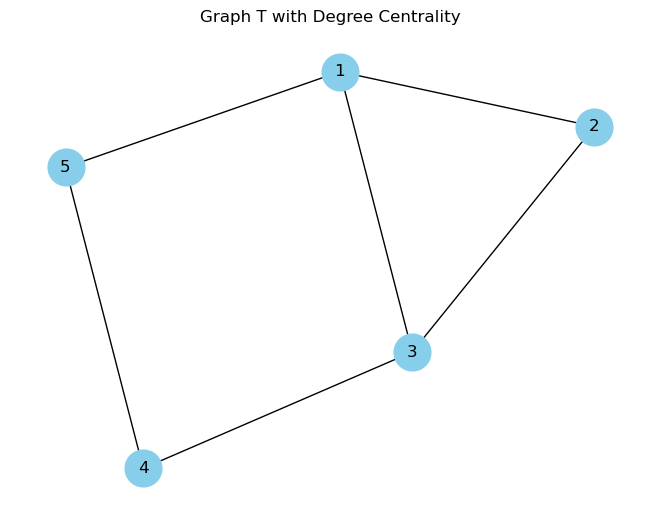

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

# Synthetic graph
T = nx.Graph()
T.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 1)])

# How to get the degree centrality
degree_centrality = nx.degree_centrality(T)

# Just a fancy plot for each node
for node, centrality in degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {centrality:.3f}")

# Plot the graph
pos = nx.spring_layout(T)
nx.draw(T, pos, with_labels=True, node_size=700, node_color='skyblue')
plt.title('Graph T with Degree Centrality')
plt.show()


# Challenge 1

It's time for you to apply everything you learned by analyzing a case study of GitHub's collaborator network data.

- **Data**: `github_users.p` (avaliable in Moodle)

> This dataset is a GitHub user collaboration network. As you already know, GitHub is a social coding site where users can collaborate on code repositories. In this network, nodes are users, and edges indicate that two users are collaborators on at least one GitHub repository.

1. Read the GitHub network dataset.
2. Describe using the basic functions of the graph's size. Explore nodes and edges. Provide how many nodes and edges are present in the network
3. Calculate the **degree centrality** of the GitHub collaboration network G. Using the .values() method of the network (e.g. G), extract the degree centrality values and convert them into a list. Then, plot a histogram to visualize the distribution of node degrees in the network.
4. Make a subset of the initial network (e.g. Gh_sub), where you include at least five nodes and their corresponding edges. Experiment with multiple nodes so you have a graph with enough edges to work on.
5. Plot the subset graph created.
6. Now calculate another relevant measure of the network -- **betweenness centrality**. Plot the betweenness centrality distribution of the subset you created. Tip: Same steps from the previous step, but use `nx.betweenness_centrality()`
7. Plot the Matrix, Arc and Circos from the subset.

# OSMnx

Is a Python package to download, model, analyze, and visualize street networks and other geospatial features from OpenStreetMap. You can download and model walking, driving, or biking networks with a single line of code then easily analyze and visualize them. You can just as easily work with urban amenities/points of interest, building footprints, transit stops, elevation data, street orientations, speed/travel time, and routing.[1]

[1]:https://geoffboeing.com/2016/11/osmnx-python-street-networks/

> The following practice are based on the OSMnx Examples Gallery[2]

[2]: https://github.com/gboeing/osmnx-examples/tree/main?tab=readme-ov-file#osmnx-examples-gallery

In [ ]:
#pip install osmnx
#Install this package in case it is needed.

In [ ]:
import networkx as nx
import osmnx as ox

## Fetch data from OSM

There are multiple ways to fetch the data from OSM, using osmnx

### Using a Place to Geocode

In [ ]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("St Andrews", network_type="drive")
fig, ax = ox.plot_graph(G)

Here is the https://nominatim.openstreetmap.org/ui/search.html geocoding server we are using

### Making a query in a form of a Dict.

In [ ]:
# You can make the query an unambiguous dict to help the geocoder find it
place = {"city": "San Francisco", "state": "California", "country": "USA"}
G = ox.graph_from_place(place, network_type="drive", truncate_by_edge=True)
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color="y", edge_linewidth=0.2)

In [ ]:
# You can get networks anywhere in the world
G = ox.graph_from_place("Sinalunga, Italy", network_type="all")
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5)

### Using a centre or BBox

In [ ]:
# or get network by address, coordinates, bounding box, or any custom polygon
# ...useful when OSM just doesn't already have a polygon for the place you want
wurster_hall = (37.870605, -122.254830)
one_mile = 1609  # meters
G = ox.graph_from_point(wurster_hall, dist=one_mile, network_type="drive")
fig, ax = ox.plot_graph(G, node_size=0)

### Fetch other type of features

In [ ]:
# get NY subway rail network
G = ox.graph_from_place(
    "New York, New York, USA",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"~"subway"]',
)

fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

In [ ]:
# get all building footprints in some neighborhood
place = "SoHo, New York, NY"
tags = {"building": True}
gdf = ox.features_from_place(place, tags)
gdf.shape

In [ ]:
warnings.simplefilter('ignore', DeprecationWarning)

fig, ax = ox.plot_footprints(gdf, figsize=(12, 10))

> Now, try to find street network from other places or cities, for each method. 

## Convert your MutiDiGraph to other formats or Graphs.


Probably the most common for you will be the GeoDataframes

In [ ]:
warnings.simplefilter('ignore', DeprecationWarning)

# convert your MultiDiGraph to an undirected MultiGraph
M = ox.utils_graph.get_undirected(G)

# convert your MultiDiGraph to a DiGraph without parallel edges
D = ox.utils_graph.get_digraph(G)

# You can convert your graph to node and edge  GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [ ]:
gdf_nodes.head()

In [ ]:
gdf_edges.head()
# Can you see the structure of this nested table?

## Basic street network stats

In [ ]:
# What sized area does our network cover in square meters?
warnings.filterwarnings('ignore')
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

In [ ]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_int_tol=15)

Check this link to get all the available stats you can get from a street network 
stats documentation: https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats



## Visualize street centrality

Here we plot the street network and color its edges (streets) by their relative closeness centrality.

In [ ]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, "edge_centrality")

In [ ]:
# color edges in original graph with closeness centralities from line graph
ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)

## Routing

In [ ]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.graph_from_place("Dunfermline, Scotland", network_type="drive")
fig, ax = ox.plot_graph(G)

G = ox.speed.add_edge_speeds(G)
G = ox.speed.add_edge_travel_times(G)

In [ ]:
# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=-3.43071, Y=56.07775)
dest = ox.distance.nearest_nodes(G, X=-3.40972, Y=56.05672)

In [ ]:

# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(G, route, node_size=0)

In [ ]:
# how long is our route in meters?
edge_lengths = ox.utils_graph.route_to_gdf(G, route)["length"]
round(sum(edge_lengths))

In [ ]:
# how far is it between these two nodes as the crow flies?
# use OSMnx's vectorized great-circle distance (haversine) function
orig_x = G.nodes[orig]["x"]
orig_y = G.nodes[orig]["y"]
dest_x = G.nodes[dest]["x"]
dest_y = G.nodes[dest]["y"]
round(ox.distance.great_circle(orig_y, orig_x, dest_y, dest_x))

Your turn try to find another city and compute the nearest route. and the basic stats.

In [ ]:
#Add your code here.

### Add Elevation profile to routing

> You can add elevation attributes to your graph's nodes automatically with the elevation module, using either local raster files or the Google Maps Elevation API.

1. Go to https://developers.google.com/maps/documentation/elevation/get-api-key
2. Follow the instructions to get the google elevation api key. This is a paid service, but you can get a free trial where you can get an API key and complete this part. You don't need to restrict your API key as it would not be used in production env.
3. **NOTE:** DO NOT ADD ANY PAYMENT METHOD...this is an entirely academic exercise; if you don't have access to a Free Trial, then skip the next part. 

> This is probably new for you, but we can use the method `try/except` to control potential errors in our code. This is very useful to make our code more easy to digest. So you can add `try:`, then the code you would like to run, and if there is any problem, then add `except` to print or customize the error.
> 

In [ ]:
# Add elevation to nodes automatically, calculate edge grades, plot network
try:
    from keys import google_elevation_api_key
    G = ox.elevation.add_node_elevations_google(G, api_key=google_elevation_api_key) #replace your key here!
    G = ox.elevation.add_edge_grades(G)
    nc = ox.plot.get_node_colors_by_attr(G, "elevation", cmap="plasma")
    fig, ax = ox.plot_graph(G, node_color=nc, node_size=20, edge_linewidth=2, edge_color="#333")
except ImportError:
    print("You need a google_elevation_api_key to run this cell.")

Nodes are colored from lowest elevation (dark blue) to highest (bright yellow).

There is an example here (https://github.com/gboeing/osmnx-examples/blob/bb870c225906db5a7b02c4c87a28095cb9dceb30/notebooks/12-node-elevations-edge-grades.ipynb) of how to create the same outcome by using a local elevation model and creating elevation-based impedance functions to route around hills.

## Street network figure-ground diagrams
This is a cool feature from the OSMnx library you can plot a figure-ground figures from your favorites places.

In [ ]:
import osmnx as ox
from IPython.display import Image

In [ ]:
# configure the inline image display
img_folder = "images"
extension = "png"
size = 240
dpi = 40

In [ ]:
place = "portland"
point = (45.517309, -122.682138)
fp = f"./{img_folder}/{place}.{extension}"
fig, ax = ox.plot_figure_ground(
    point=point,
    network_type="drive",
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

In [ ]:
place = "barcelona-gothic"
point = (41.382850, 2.174192)
fp = f"./{img_folder}/{place}.{extension}"
fig, ax = ox.plot_figure_ground(
    point=point,
    network_type="all",
    default_width=3.3,
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

In [ ]:
street_widths = {
    "footway": 0.5,
    "steps": 0.5,
    "pedestrian": 0.5,
    "path": 0.5,
    "track": 0.5,
    "service": 2,
    "residential": 3,
    "primary": 5,
    "motorway": 6,
}
place = "sf-custom"
point = (37.793897, -122.402189)
fp = f"./{img_folder}/{place}.{extension}"
fig, ax = ox.plot_figure_ground(
    point=point,
    filepath=fp,
    network_type="all",
    street_widths=street_widths,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

> Would you care the custome the previous figure-ground plots to add the name of the place at the top so you have a cool map?

## Explore urban networks as interactive web maps


In [ ]:
warnings.filterwarnings('ignore')
# download a street network then solve a shortest-path route on it
weight = "length"
G = ox.graph_from_place("Candelaria, Bogota", network_type="drive")
orig = list(G.nodes)[0]
dest = list(G.nodes)[-1]
route = ox.shortest_path(G, orig, dest, weight=weight)

In [ ]:
# explore graph edges interactively, with a simple one-liner
ox.graph_to_gdfs(G, nodes=False).explore()

In [ ]:
# explore graph nodes interactively, with different basemap tiles
nodes = ox.graph_to_gdfs(G, edges=False)
nodes.explore(tiles="cartodbpositron", marker_kwds={"radius": 8})

In [ ]:
# explore nodes and edges together in a single map
nodes, edges = ox.graph_to_gdfs(G)
m = edges.explore(color="skyblue", tiles="cartodbdarkmatter")
nodes.explore(m=m, color="pink", marker_kwds={"radius": 6})

In [ ]:
# explore graph edges interactively, colored by length
edges.explore(tiles="cartodbdarkmatter", column="length", cmap="plasma")

In [ ]:
# explore graph nodes interactively, colored by betweenness centrality
nx.set_node_attributes(G, nx.betweenness_centrality(G, weight="length"), name="bc")
nodes = ox.graph_to_gdfs(G, edges=False)
nodes.explore(tiles="cartodbdarkmatter", column="bc", marker_kwds={"radius": 8})

## Save/Export your network in another format.
It is very useful to use the graph in another GIS software or python library

In [ ]:
# Save graph to disk as geopackage (for GIS) or graphml file (for gephi etc)
ox.save_graph_geopackage(G, filepath="./data/mynetwork.gpkg")
ox.save_graphml(G, filepath="./data/mynetwork.graphml")

# Challenge 2

This challenge is about OSMnx. You will explore and analyze a city's street network using the OSMnx Python library.

1. Use OSMnx to download the street network of a city of your choice. You can specify the city name, BBox or a Dict.
2. Calculate basic statistics for the street network, such as the number of nodes, edges, average node degree, etc.
3. Use OSMnx to plot the street network. Customize the plot to make it visually appealing, including node size, edge color. See the potential options here: https://osmnx.readthedocs.io/en/stable/user-reference.html#module-osmnx.plot
4. Utilize the routing capabilities of OSMnx to find the shortest path between two points in the street network. Plot the route on top of the street network.
5. Calculate the centrality measures (e.g., degree centrality and betweenness_centrality) for nodes in the street network.
6. Create the figure-groud from the selected city
7. Create interactive maps to plot nodes, edges, nodes+edges and one of the centrality measures.
8. Export the street network to a GeoPackage (.gpkg) file. Ensure that the exported file contains both node and edge attributes. Demonstrate that the new GeoPackage can be used and read in Python using any of the libraries we have seen in the class to create a simple and interactive map.
9. Finally, use OSMnx to extract other urban elements (e.g., buildings, parks) and plot them.

# Networks Data source

https://snap.stanford.edu/data/

# Finishing the Lab

Please ensure that you save all your code and upload the latest version of this notebook to your **GitHub repository**. 

> Always check the size of your notebook before making any commit; use the `.gitignore` to skip big data sets or undesired files., but describe where to find the data and the correct structure, so when the marker forks, your code will be able to reproduce your results. 


# More resources

* https://en.wikipedia.org/wiki/Network_theory
* OSMnx Examples Gallery - https://github.com/gboeing/osmnx-examples
* https://networkx.org/documentation/latest/index.html
* https://nxviz.readthedocs.io/en/latest/index.html